In [ ]:
from PIL import Image, ExifTags
import matplotlib.pyplot as plt

In [ ]:
def upload_n_get_metadata(img : str ):
  img = Image.open(img)

  print("Format:", img.format)
  print("Size:", img.size)
  print("Mode:", img.mode)
  print("Info:", img.info)

  exif_data = img._getexif()
  print(exif_data)

  if exif_data:
     for tag_id, value in exif_data.items():
        tag = ExifTags.TAGS.get(tag_id, tag_id)
        print(tag)
        print(f"{tag:25}: {value}")
  else:
     print("No EXIF metadata found.")




In [ ]:
upload_n_get_metadata("/content/br1.jpg")

Format: JPEG
Size: (173, 201)
Mode: RGB
Info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
None
No EXIF metadata found.


'jfif': 257 → Identifies that the file follows the JFIF standard (JPEG File Interchange Format).

'jfif_version': (1, 1) → JFIF version 1.1 (pretty standard for JPEGs).

'jfif_unit': 0 → Unit for pixel density:

0 = no units (aspect ratio only).

1 = dots per inch.

2 = dots per cm.

'jfif_density': (1, 1) → Horizontal and vertical pixel density (here both 1, meaning no scaling preference — just a default).

## crop resize and rotate


In [ ]:
def resize_img(img_path : str , new_width : int , new_height : int):
  img = Image.open(img_path)
  resized_img = img.resize((new_width, new_height))
  resized_img.save(f"{img_path}_resized_image.jpg")
  fig, axs = plt.subplots(1, 4, figsize=(15, 5))
  axs[0].imshow(img)
  axs[0].set_title("Original")
  axs[0].axis("off")
  axs[0].imshow(resized_img)
  axs[0].set_title("Resized")
  axs[0].axis("off")


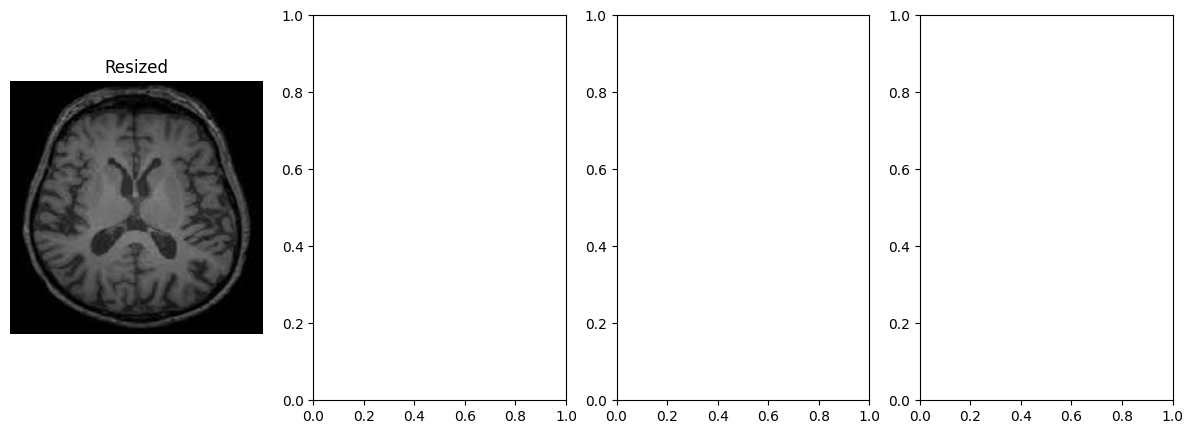

In [ ]:
resize_img( "/content/br1.jpg", 500 , 500)

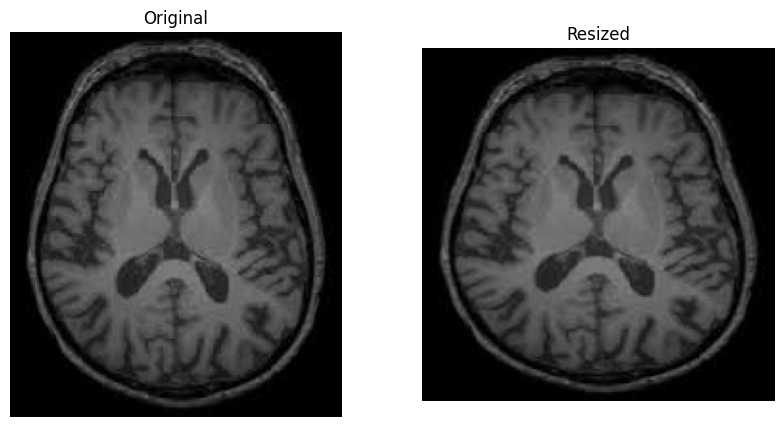

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def resize_img(img_path: str, new_width: int, new_height: int):
    # Open image
    img = Image.open(img_path)

    # Resize image
    resized_img = img.resize((new_width, new_height))

    # Save resized image
    resized_img.save(f"{img_path}_resized.jpg")

    # Show before and after
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(img)
    axs[0].set_title("Original")
    axs[0].axis("off")

    axs[1].imshow(resized_img)
    axs[1].set_title("Resized")
    axs[1].axis("off")

    plt.show()

# Example usage
resize_img("/content/br1.jpg", 200, 200)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def resize_img(img_path: str, new_width: int, new_height: int):
    # Open image
    img = Image.open(img_path)

    # Resize image
    resized_img = img.resize((new_width, new_height))

    # Save resized image
    resized_img.save(f"{img_path}_resized.jpg")

    # Show before and after
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(img)
    axs[0].set_title("Original")
    axs[0].axis("off")

    axs[1].imshow(resized_img)
    axs[1].set_title("Resized")
    axs[1].axis("off")

    plt.show()

# Example usage
resize_img("/content/br1.jpg", 200, 200)


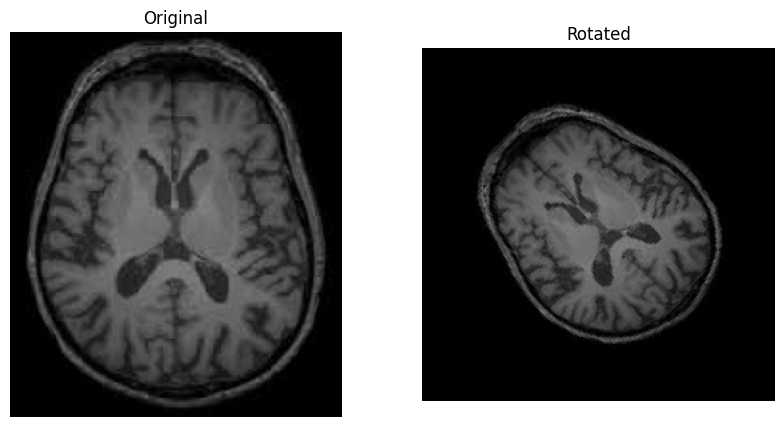

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def rotate_img(img_path: str, angle : int):
    # Open image
    img = Image.open(img_path)

    # Resize image
    rotated_img = img.rotate(angle , expand=True)

    # Save resized image
    rotated_img.save(f"{img_path}_resized.jpg")

    # Show before and after
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(img)
    axs[0].set_title("Original")
    axs[0].axis("off")

    axs[1].imshow(rotated_img)
    axs[1].set_title("Rotated")
    axs[1].axis("off")

    plt.show()

# Example usage
rotate_img("/content/br1.jpg", 45)


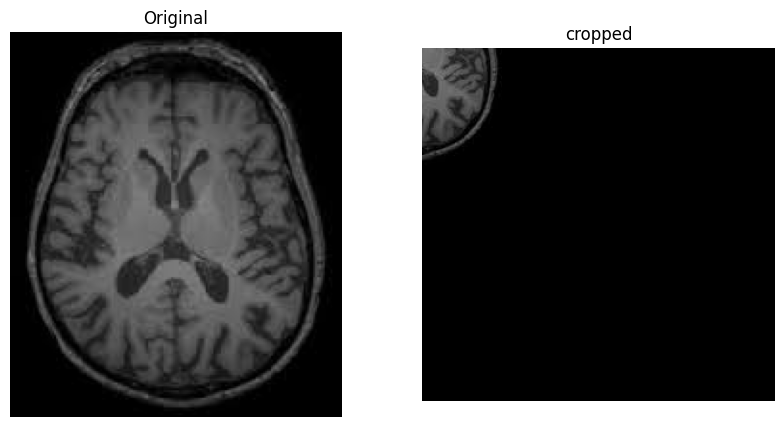

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def crop_img(img_path: str, start_row : int , start_col:int , end_row : int , end_col :int):
    # Open image
    img = Image.open(img_path)
    crop_box = (start_row, start_col , end_row , end_col)
    cropped_img = img.crop(crop_box)



    # Save  image
    cropped_img.save(f"{img_path}_croped.jpg")

    # Show before and after
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(img)
    axs[0].set_title("Original")
    axs[0].axis("off")

    axs[1].imshow(cropped_img)
    axs[1].set_title("cropped")
    axs[1].axis("off")

    plt.show()

# Example usage
crop_img("/content/br1.jpg", 100,100 , 400 , 400)


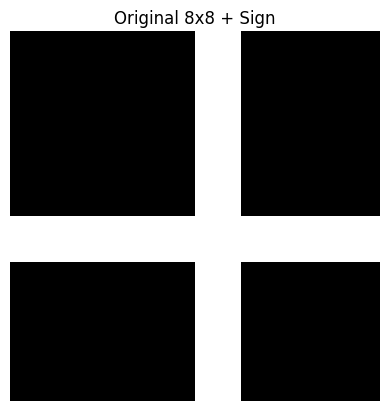

[[  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]
 [255 255 255 255 255 255 255 255]
 [  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]]


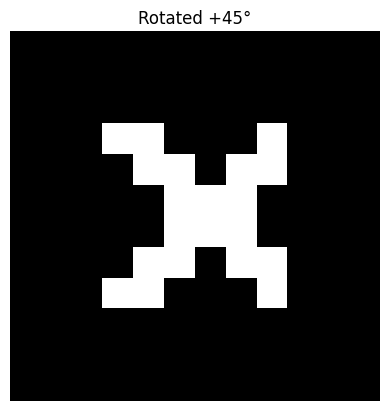

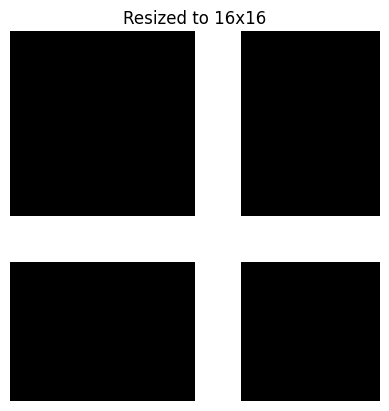

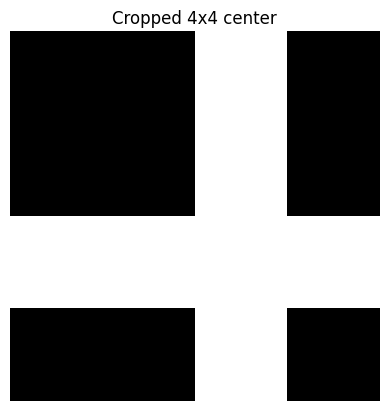

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def create_plus_matrix(size=8):
    # Initialize all black pixels (0 = black, 255 = white)
    mat = np.zeros((size, size), dtype=np.uint8)

    # Draw a plus sign (vertical + horizontal middle line = white)
    mid = size // 2
    mat[mid, :] = 255      # horizontal line
    mat[:, mid] = 255      # vertical line

    return mat

def show_matrix_as_image(mat, title="Image"):
    img = Image.fromarray(mat)  # Convert matrix to image
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.title(title)
    plt.axis("off")
    plt.show()
    print(mat)   # also print matrix for clarity

# Create universal 8x8 "+" image
plus_mat = create_plus_matrix(8)

# Show original
show_matrix_as_image(plus_mat, "Original 8x8 + Sign")

# Rotate
rotated = Image.fromarray(plus_mat).rotate(45, expand=True)
plt.imshow(rotated, cmap="gray", vmin=0, vmax=255)
plt.title("Rotated +45°")
plt.axis("off")
plt.show()


# Resize (bigger)
resized = Image.fromarray(plus_mat).resize((16, 16), Image.NEAREST)
plt.imshow(resized, cmap="gray", vmin=0, vmax=255)
plt.title("Resized to 16x16")
plt.axis("off")
plt.show()

# Crop
cropped = Image.fromarray(plus_mat).crop((2, 2, 6, 6))
plt.imshow(cropped, cmap="gray", vmin=0, vmax=255)
plt.title("Cropped 4x4 center")
plt.axis("off")
plt.show()


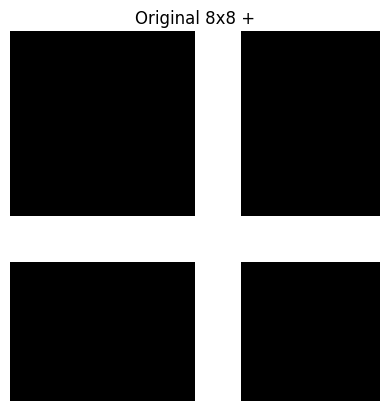

Original matrix:
 [[  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]
 [255 255 255 255 255 255 255 255]
 [  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0   0]] 



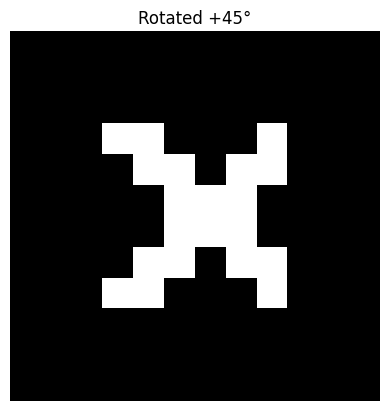

Rotated matrix (+45°):
 [[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 255 255   0   0   0 255   0   0   0]
 [  0   0   0   0 255 255   0 255 255   0   0   0]
 [  0   0   0   0   0 255 255 255   0   0   0   0]
 [  0   0   0   0   0 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255   0 255 255   0   0   0]
 [  0   0   0 255 255   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def create_plus_matrix(size=8):
    mat = np.zeros((size, size), dtype=np.uint8)
    mid = size // 2
    mat[mid, :] = 255      # horizontal line
    mat[:, mid] = 255      # vertical line
    return mat

# Create original 8x8 "+" matrix
plus_mat = create_plus_matrix(8)

# Show original
plt.imshow(plus_mat, cmap="gray", vmin=0, vmax=255)
plt.title("Original 8x8 +")
plt.axis("off")
plt.show()
print("Original matrix:\n", plus_mat, "\n")

# Rotate by +45 degrees (nearest neighbor to avoid gray pixels)
rotated_img = Image.fromarray(plus_mat).rotate(45, expand=True, resample=Image.NEAREST)
rotated_mat = np.array(rotated_img)

# Show rotated image
plt.imshow(rotated_mat, cmap="gray", vmin=0, vmax=255)
plt.title("Rotated +45°")
plt.axis("off")
plt.show()

# Print rotated matrix
print("Rotated matrix (+45°):\n", rotated_mat)


Original Matrix:
 [[  0   0 255   0   0   0   0   0]
 [  0   0 255   0   0   0   0   0]
 [255 255 255 255 255 255 255 255]
 [  0   0 255   0   0   0   0   0]
 [  0   0 255   0   0   0   0   0]
 [  0   0 255   0   0   0   0   0]
 [  0   0 255   0   0   0   0   0]
 [  0   0 255   0   0   0   0   0]]

Resized Matrix:
 [[  0 255   0   0   0]
 [255 255 255 255 255]
 [  0 255   0   0   0]
 [  0 255   0   0   0]
 [  0 255   0   0   0]]


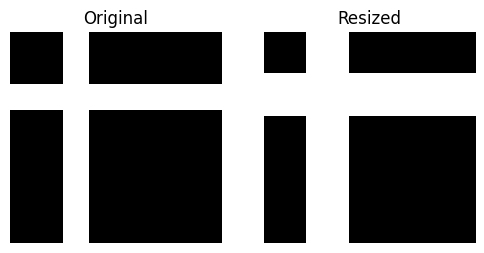


Cropped Matrix:
 [[255 255 255 255]
 [255   0   0   0]
 [255   0   0   0]
 [255   0   0   0]]


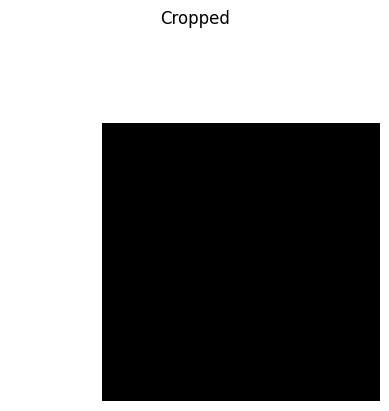

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Create an 8x8 '+' matrix (0=black, 255=white)
plus_mat = np.array([
    [0,0,255,0,0,0,0,0],
    [0,0,255,0,0,0,0,0],
    [255,255,255,255,255,255,255,255],
    [0,0,255,0,0,0,0,0],
    [0,0,255,0,0,0,0,0],
    [0,0,255,0,0,0,0,0],
    [0,0,255,0,0,0,0,0],
    [0,0,255,0,0,0,0,0]
], dtype=np.uint8)

# Convert to PIL Image
img = Image.fromarray(plus_mat)

# ------------------ RESIZE ------------------
new_width, new_height = 5, 5
resized_img = img.resize((new_width, new_height), Image.NEAREST)
resized_mat = np.array(resized_img)

print("Original Matrix:\n", plus_mat)
print("\nResized Matrix:\n", resized_mat)

# Display
fig, axs = plt.subplots(1, 2, figsize=(6,3))
axs[0].imshow(plus_mat, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Original")
axs[0].axis("off")
axs[1].imshow(resized_mat, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Resized")
axs[1].axis("off")
plt.show()

# ------------------ CROP ------------------
crop_box = (2, 2, 6, 6)  # left, upper, right, lower
cropped_img = img.crop(crop_box)
cropped_mat = np.array(cropped_img)

print("\nCropped Matrix:\n", cropped_mat)

plt.imshow(cropped_mat, cmap='gray', vmin=0, vmax=255)
plt.title("Cropped")
plt.axis("off")
plt.show()


In [ ]:
#write obsv in file

Observation on Pixel Matrix Changes in an Image:

Cropping:

Only a portion of the original image is kept.

The pixel matrix shrinks to the selected region.

Pixel values outside the cropped area are discarded.

Resizing:

The image dimensions (rows × columns) change.

Pixel values are interpolated (upscaled or downscaled) to fit the new size.

Can cause loss of detail when shrinking or blurring when enlarging.

Rotation:

The pixel positions are rearranged around a pivot (usually the center).

Some pixels may be filled with background if rotation creates empty spaces.

The pixel matrix shape may expand to accommodate the rotated image.

💡 Summary: Cropping reduces the matrix size, resizing changes it with interpolation, and rotation rearranges pixel positions, sometimes changing the matrix shape.


Original Image (3×3 pixel matrix):

[ [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9] ]

1️⃣ Cropping

If we crop the top-left 2×2 part, we get:

[ [1, 2],
  [4, 5] ]


✅ Pixel matrix shrinks. Pixels outside are gone.

2️⃣ Resizing

If we resize to 2×2, values are averaged/interpolated:

[ [1, 3],
  [7, 9] ]


✅ Matrix changes size. Pixel values are adjusted to fit the new size.

3️⃣ Rotation (90° clockwise)

Rotate the original 3×3:

[ [7, 4, 1],
  [8, 5, 2],
  [9, 6, 3] ]


✅ Pixels move positions around the center. The matrix shape stays same for 90° rotation.

💡 Summary:

Crop: cut → smaller matrix

Resize: stretch/shrink → new matrix size

Rotate: move pixels → positions change

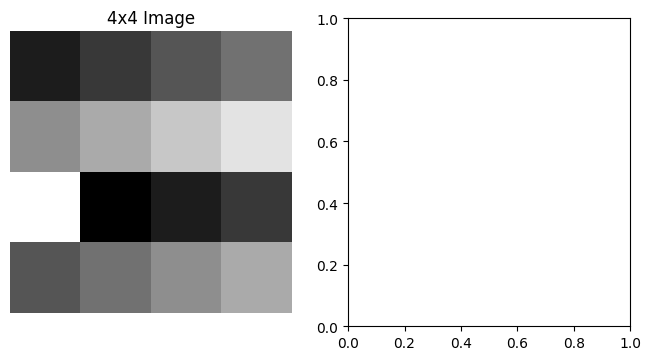

In [ ]:
#nearest neighbor pixel replication
import numpy as np
import matplotlib.pyplot as plt

# Original 4x4 image matrix
img_4x4 = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 0, 1, 2],
    [3, 4, 5, 6]
])


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8,4))

axes[0].imshow(img_4x4, cmap='gray', interpolation='nearest')
axes[0].set_title("4x4 Image")
axes[0].axis('off')


plt.show()


aplication segmentation blocks but makes it blockyy

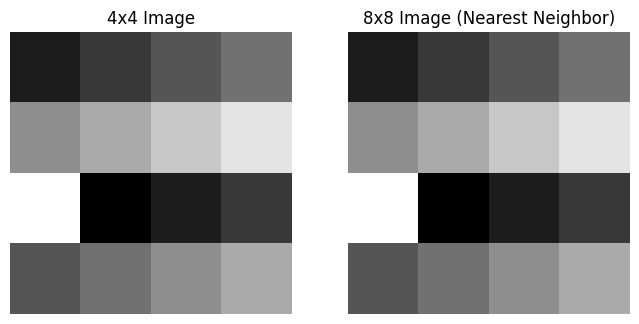

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Original 4x4 image matrix
img_8x8 = np.array([
 [1, 1, 2, 2, 3, 3, 4, 4],
 [1, 1, 2, 2, 3, 3, 4, 4],
 [5, 5, 6, 6, 7, 7, 8, 8],
 [5, 5, 6, 6, 7, 7, 8, 8],
 [9, 9, 0, 0, 1, 1, 2, 2],
 [9, 9, 0, 0, 1, 1, 2, 2],
 [3, 3, 4, 4, 5, 5, 6, 6],
 [3, 3, 4, 4, 5, 5, 6, 6]
])


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8,4))

axes[0].imshow(img_4x4, cmap='gray', interpolation='nearest')
axes[0].set_title("4x4 Image")
axes[0].axis('off')

axes[1].imshow(img_8x8, cmap='gray', interpolation='nearest')
axes[1].set_title("8x8 Image (Nearest Neighbor)")
axes[1].axis('off')

plt.show()


In [ ]:
for ax, img, title in zip(axes, [img_4x4, img_8x8], ["4x4 Image", "8x8 Zoomed"]):
    ax.imshow(img, cmap='gray', interpolation='nearest')
    ax.set_title(title)
    ax.axis('off')
    ax.set_aspect('equal')  # ensure each pixel is square

plt.show()

no new pixels created , just replication done

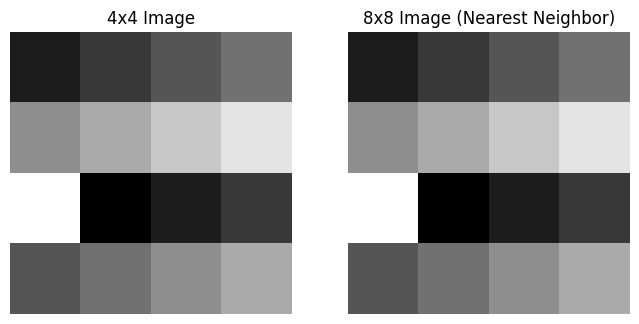

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Original 4x4 image matrix
img_4x4 = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 0, 1, 2],
    [3, 4, 5, 6]
])

# Upscale using nearest neighbor (2x2 replication)
img_8x8 = np.kron(img_4x4, np.ones((2,2)))  # Kronecker product replicates pixels

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8,4))

axes[0].imshow(img_4x4, cmap='gray', interpolation='nearest')
axes[0].set_title("4x4 Image")
axes[0].axis('off')

axes[1].imshow(img_8x8, cmap='gray', interpolation='nearest')
axes[1].set_title("8x8 Image (Nearest Neighbor)")
axes[1].axis('off')

plt.show()


Enter scale factor (e.g., 2, 3, 4): 2


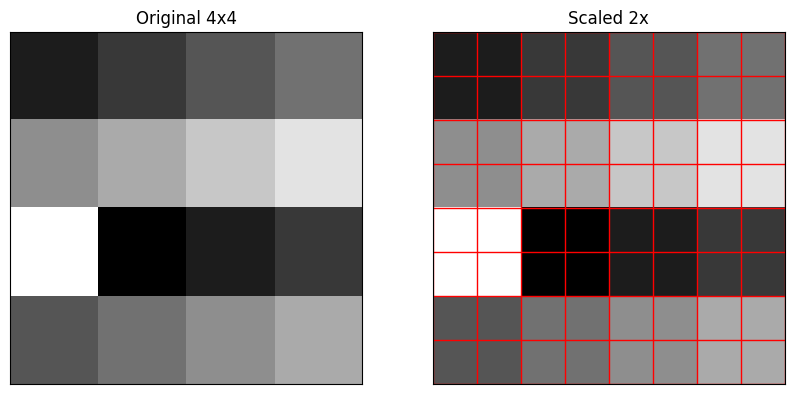

[[ 28  28  56  56  84  84 112 112]
 [ 28  28  56  56  84  84 112 112]
 [140 140 168 168 196 196 224 224]
 [140 140 168 168 196 196 224 224]
 [252 252   0   0  28  28  56  56]
 [252 252   0   0  28  28  56  56]
 [ 84  84 112 112 140 140 168 168]
 [ 84  84 112 112 140 140 168 168]]


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def scale_and_show_image(scale_factor):
    """
    Scales a 4x4 image matrix using nearest neighbor pixel replication
    and shows both original and scaled images with grid lines.

    Args:
        scale_factor (int): Factor to scale the image (e.g., 2, 3, 4)
    """
    # Original 4x4 image matrix (grayscale)
    img_4x4 = np.array([
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 0, 1, 2],
        [3, 4, 5, 6]
    ], dtype=np.uint8) * 28  # scale to 0-255 for visualization

    # Resize using nearest neighbor
    new_size = (img_4x4.shape[1] * scale_factor, img_4x4.shape[0] * scale_factor)
    img_scaled = cv2.resize(img_4x4, new_size, interpolation=cv2.INTER_NEAREST)

    # Function to plot image with grid
    def plot_with_grid(ax, img, title):
        ax.imshow(img, cmap='gray', interpolation='nearest')
        ax.set_title(title)
        ax.set_xticks(np.arange(-0.5, img.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, img.shape[0], 1), minor=True)
        ax.grid(which='minor', color='red', linestyle='-', linewidth=1)
        ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    # Plot images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    plot_with_grid(axes[0], img_4x4, "Original 4x4")
    plot_with_grid(axes[1], img_scaled, f"Scaled {scale_factor}x")
    plt.show()
    print(img_scaled)

# Example usage
scale_factor = int(input("Enter scale factor (e.g., 2, 3, 4): "))
scale_and_show_image(scale_factor)


Enter scale factor (e.g., 2, 3, 4): 2


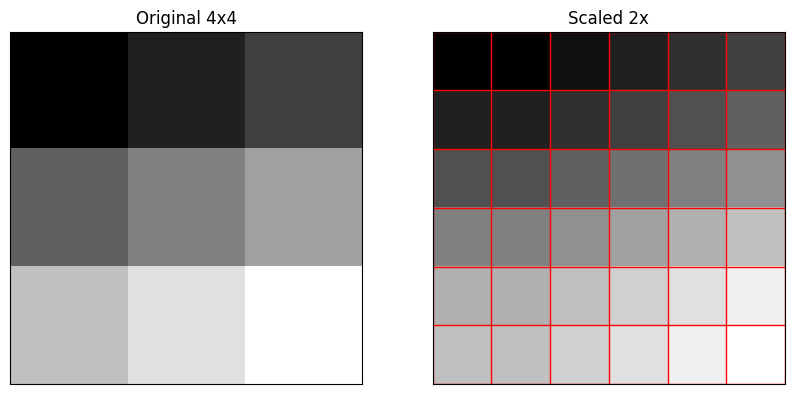

---------Image scaled ------
[[ 2  2  3  4  5  6]
 [ 4  4  5  6  7  8]
 [ 7  7  8  9 10 11]
 [10 10 11 12 13 14]
 [13 13 14 15 16 17]
 [14 14 15 16 17 18]]


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def scale_and_show_image(scale_factor):
    """
    Scales a 4x4 image matrix using nearest neighbor pixel replication
    and shows both original and scaled images with grid lines.

    Args:
        scale_factor (int): Factor to scale the image (e.g., 2, 3, 4)
    """
    # Original 4x4 image matrix (grayscale)
    img_4x4 = np.array([
        [2, 4, 6],
        [8,10,12],
        [14,16,18]

    ], dtype=np.uint8)

    # Resize using nearest neighbor
    new_size = (img_4x4.shape[1] * scale_factor, img_4x4.shape[0] * scale_factor)
    img_scaled = cv2.resize(img_4x4, new_size, interpolation=cv2.INTER_LINEAR)

    # Function to plot image with grid
    def plot_with_grid(ax, img, title):
        ax.imshow(img, cmap='gray', interpolation='nearest')
        ax.set_title(title)
        ax.set_xticks(np.arange(-0.5, img.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, img.shape[0], 1), minor=True)
        ax.grid(which='minor', color='red', linestyle='-', linewidth=1)
        ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    # Plot images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    plot_with_grid(axes[0], img_4x4, "Original 4x4")
    plot_with_grid(axes[1], img_scaled, f"Scaled {scale_factor}x")
    plt.show()

    print("---------Image scaled ------")
    print(img_scaled)

# Example usage
scale_factor = int(input("Enter scale factor (e.g., 2, 3, 4): "))
scale_and_show_image(scale_factor)


Enter scale factor (e.g., 2, 3, 4): 2


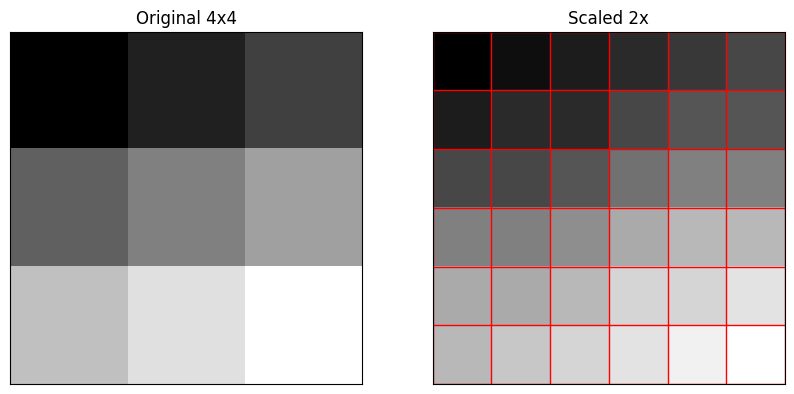

---------Image scaled ------
[[ 1  2  3  4  5  6]
 [ 3  4  4  6  7  7]
 [ 6  6  7  9 10 10]
 [10 10 11 13 14 14]
 [13 13 14 16 16 17]
 [14 15 16 17 18 19]]


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def scale_and_show_image(scale_factor):
    """
    Scales a 4x4 image matrix using nearest neighbor pixel replication
    and shows both original and scaled images with grid lines.

    Args:
        scale_factor (int): Factor to scale the image (e.g., 2, 3, 4)
    """
    # Original 4x4 image matrix (grayscale)
    img_4x4 = np.array([
        [2, 4, 6],
        [8,10,12],
        [14,16,18]

    ], dtype=np.uint8)
    # Resize using nearest neighbor
    new_size = (img_4x4.shape[1] * scale_factor, img_4x4.shape[0] * scale_factor)
    img_scaled = cv2.resize(img_4x4, new_size, interpolation=cv2.INTER_CUBIC)

    # Function to plot image with grid
    def plot_with_grid(ax, img, title):
        ax.imshow(img, cmap='gray', interpolation='nearest')
        ax.set_title(title)
        ax.set_xticks(np.arange(-0.5, img.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, img.shape[0], 1), minor=True)
        ax.grid(which='minor', color='red', linestyle='-', linewidth=1)
        ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    # Plot images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    plot_with_grid(axes[0], img_4x4, "Original 4x4")
    plot_with_grid(axes[1], img_scaled, f"Scaled {scale_factor}x")
    plt.show()

    print("---------Image scaled ------")
    print(img_scaled)

# Example usage
scale_factor = int(input("Enter scale factor (e.g., 2, 3, 4): "))
scale_and_show_image(scale_factor)


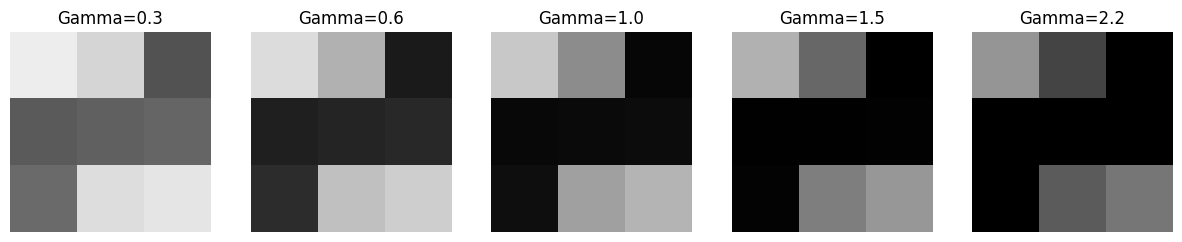

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img_= np.array([
        [200, 140, 6],
        [8,10,12],
        [14,160,180]

    ], dtype=np.uint8)



# Convert to float32 and normalize
img_float = img_ / 255.0

def gamma_correction(image, gamma=1.0):

    return np.power(image, gamma)


# Apply gamma correction for demonstration
gammas = [0.3, 0.6, 1.0, 1.5, 2.2]

plt.figure(figsize=(15,5))
for i, g in enumerate(gammas):
    corrected = gamma_correction(img_float, g)
    plt.subplot(1, len(gammas), i+1)
    plt.imshow(cv2.cvtColor((corrected*255).astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title(f'Gamma={g}')
    plt.axis('off')
plt.show()


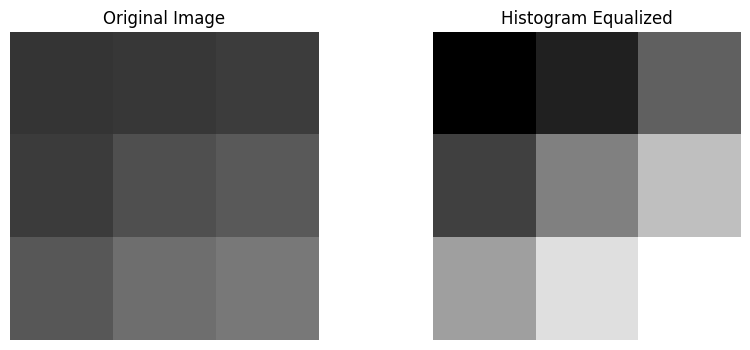

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 3x3 grayscale image (values 0–255)
img = np.array([[52, 55, 61],
                [59, 79, 90],
                [87, 110, 120]], dtype=np.uint8)

# Apply Histogram Equalization
equalized = cv2.equalizeHist(img)

# Display the original and equalized images
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Histogram Equalized')
plt.axis('off')

plt.show()




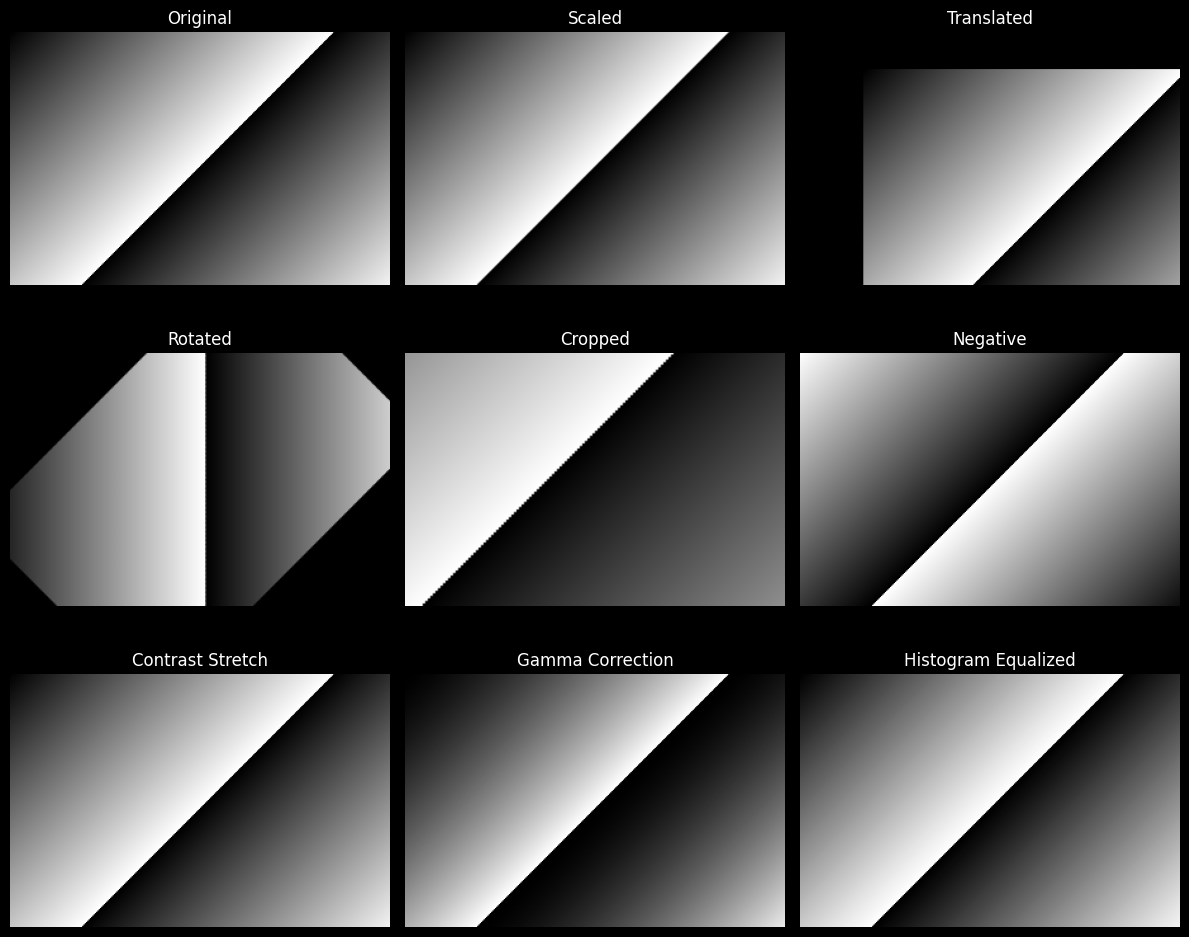

In [ ]:
# Colab-friendly: show captions (titles) above images only — no labels drawn on images
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Optional: make matplotlib use a dark background (nice for Colab viewers)
plt.style.use('dark_background')

# ---------------------------
# 0) Create a synthetic grayscale matrix (image)
# ---------------------------
rows, cols = 200, 300
img = np.zeros((rows, cols), dtype=np.uint8)
# create a simple gradient pattern (for visible effects)
for i in range(rows):
    for j in range(cols):
        img[i, j] = (i + j) % 256

# ---------------------------
# 1) GEOMETRICAL TRANSFORMATIONS
# ---------------------------

# (a) Scaling (resize)
scaled_img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# (b) Translation (move right by 50 px and down by 30 px)
M_translate = np.float32([[1, 0, 50], [0, 1, 30]])
translated_img = cv2.warpAffine(img, M_translate, (cols, rows))  # output same size as original

# (c) Rotation (45 degrees about image center)
center = (cols / 2, rows / 2)
angle = 45
scale_val = 1.0
M_rotate = cv2.getRotationMatrix2D(center, angle, scale_val)
rotated_img = cv2.warpAffine(img, M_rotate, (cols, rows))  # same output size

# ---------------------------
# 2) CROP (image editing)
# ---------------------------
crop_img = img[50:150, 100:250]  # shape (100,150)

# ---------------------------
# 3) IMAGE ENHANCEMENT / TRANSFORMS
# ---------------------------

# (a) Image Negative
negative_img = 255 - img

# (b) Contrast Stretching (linear normalization)
min_val = int(img.min())
max_val = int(img.max())
if max_val == min_val:
    contrast_stretch = img.copy()
else:
    contrast_stretch = ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# (c) Gamma Correction (use LUT for speed)
gamma = 1.5  # >1 darkens midtones, <1 brightens
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(256)]).astype("uint8")
gamma_corrected = cv2.LUT(img, table)

# (d) Histogram Equalization
hist_eq_img = cv2.equalizeHist(img)

# ---------------------------
# 4) Prepare images & captions (no overlay text)
# ---------------------------
images_and_titles = [
    ("Original", img),
    ("Scaled", scaled_img),
    ("Translated", translated_img),
    ("Rotated", rotated_img),
    ("Cropped", crop_img),
    ("Negative", negative_img),
    ("Contrast Stretch", contrast_stretch),
    ("Gamma Correction", gamma_corrected),
    ("Histogram Equalized", hist_eq_img),
]

# ---------------------------
# 5) Display in 3x3 grid using matplotlib with captions only
# ---------------------------
plt.figure(figsize=(12, 10))

for idx, (title, im) in enumerate(images_and_titles):
    ax = plt.subplot(3, 3, idx + 1)
    # If image is single-channel (grayscale), show with cmap='gray'
    if im.ndim == 2:
        ax.imshow(im, cmap='gray', vmin=0, vmax=255)
    else:
        # If somehow already 3-channel, matplotlib expects RGB
        ax.imshow(im)
    ax.set_title(title)   # caption above the image (no text on image)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Create a simple 5x5 grayscale "image"
# Numbers represent pixel brightness (0=black, 255=white)
image = np.array([
    [10, 20, 30, 40, 50],
    [60, 70, 80, 90, 100],
    [110, 120, 130, 140, 150],
    [160, 170, 180, 190, 200],
    [210, 220, 230, 240, 250]
])

print("Original Image:\n", image)

# Function to translate image
def translate(img, shift_x, shift_y):
    """
    shift_x: +ve means move right, -ve means move left
    shift_y: +ve means move down, -ve means move up
    """
    h, w = img.shape
    result = np.zeros_like(img)  # create empty (black) image

    for y in range(h):
        for x in range(w):
            new_x = x + shift_x
            new_y = y + shift_y

            # only copy if new position is inside the image
            if 0 <= new_x < w and 0 <= new_y < h:
                result[new_y, new_x] = img[y, x]

    return result


# Move image RIGHT by 1 pixel
right_shift = translate(image, shift_x=1, shift_y=0)
print("\nImage shifted RIGHT by 1 pixel:\n", right_shift)

# Move image LEFT by 1 pixel
left_shift = translate(image, shift_x=-1, shift_y=0)
print("\nImage shifted LEFT by 1 pixel:\n", left_shift)

# Move image DOWN by 1 pixel
down_shift = translate(image, shift_x=0, shift_y=1)
print("\nImage shifted DOWN by 1 pixel:\n", down_shift)

# Move image UP by 1 pixel
up_shift = translate(image, shift_x=0, shift_y=-1)
print("\nImage shifted UP by 1 pixel:\n", up_shift)


Original Image:
 [[ 10  20  30  40  50]
 [ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]
 [210 220 230 240 250]]

Image shifted RIGHT by 1 pixel:
 [[  0  10  20  30  40]
 [  0  60  70  80  90]
 [  0 110 120 130 140]
 [  0 160 170 180 190]
 [  0 210 220 230 240]]

Image shifted LEFT by 1 pixel:
 [[ 20  30  40  50   0]
 [ 70  80  90 100   0]
 [120 130 140 150   0]
 [170 180 190 200   0]
 [220 230 240 250   0]]

Image shifted DOWN by 1 pixel:
 [[  0   0   0   0   0]
 [ 10  20  30  40  50]
 [ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]]

Image shifted UP by 1 pixel:
 [[ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]
 [210 220 230 240 250]
 [  0   0   0   0   0]]


Original Image Matrix:
 [[ 10  20  30  40  50]
 [ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]
 [210 220 230 240 250]]


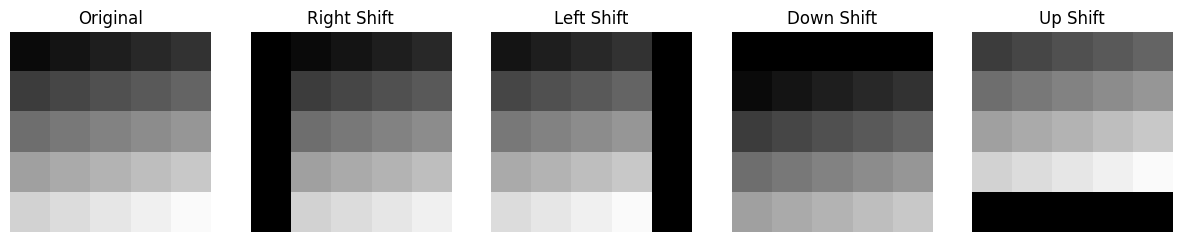


Image shifted RIGHT by 1 pixel:
 [[  0  10  20  30  40]
 [  0  60  70  80  90]
 [  0 110 120 130 140]
 [  0 160 170 180 190]
 [  0 210 220 230 240]]

Image shifted LEFT by 1 pixel:
 [[ 20  30  40  50   0]
 [ 70  80  90 100   0]
 [120 130 140 150   0]
 [170 180 190 200   0]
 [220 230 240 250   0]]

Image shifted DOWN by 1 pixel:
 [[  0   0   0   0   0]
 [ 10  20  30  40  50]
 [ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]]

Image shifted UP by 1 pixel:
 [[ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]
 [210 220 230 240 250]
 [  0   0   0   0   0]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 5x5 grayscale "image"
image = np.array([
    [10, 20, 30, 40, 50],
    [60, 70, 80, 90, 100],
    [110, 120, 130, 140, 150],
    [160, 170, 180, 190, 200],
    [210, 220, 230, 240, 250]
])

print("Original Image Matrix:\n", image)

# Function to translate image
def translate(img, shift_x, shift_y):
    """
    shift_x: +ve = move right, -ve = move left
    shift_y: +ve = move down, -ve = move up
    """
    h, w = img.shape
    result = np.zeros_like(img)

    for y in range(h):
        for x in range(w):
            new_x = x + shift_x
            new_y = y + shift_y
            if 0 <= new_x < w and 0 <= new_y < h:
                result[new_y, new_x] = img[y, x]
    return result

# Translate in different directions
right_shift = translate(image, shift_x=1, shift_y=0)
left_shift  = translate(image, shift_x=-1, shift_y=0)
down_shift  = translate(image, shift_x=0, shift_y=1)
up_shift    = translate(image, shift_x=0, shift_y=-1)

# Show results
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
titles = ["Original", "Right Shift", "Left Shift", "Down Shift", "Up Shift"]
images = [image, right_shift, left_shift, down_shift, up_shift]

for ax, title, img in zip(axs, titles, images):
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis('off')

plt.show()

# Print the matrices for better understanding
print("\nImage shifted RIGHT by 1 pixel:\n", right_shift)
print("\nImage shifted LEFT by 1 pixel:\n", left_shift)
print("\nImage shifted DOWN by 1 pixel:\n", down_shift)
print("\nImage shifted UP by 1 pixel:\n", up_shift)


Original Image Matrix:
 [[100. 102. 103. 104. 105.]
 [106. 107. 108. 109. 110.]
 [111. 112. 113. 114. 115.]
 [116. 117. 118. 119. 120.]
 [121. 122. 123. 124. 125.]]


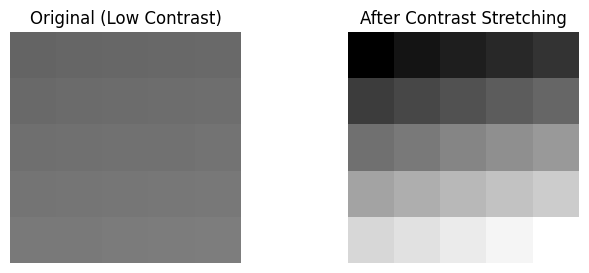


After Contrast Stretching:
 [[  0  20  30  40  51]
 [ 61  71  81  91 102]
 [112 122 132 142 153]
 [163 173 183 193 204]
 [214 224 234 244 255]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a small 5x5 grayscale image with low contrast
image = np.array([
    [100, 102, 103, 104, 105],
    [106, 107, 108, 109, 110],
    [111, 112, 113, 114, 115],
    [116, 117, 118, 119, 120],
    [121, 122, 123, 124, 125]
], dtype=np.float32)

print("Original Image Matrix:\n", image)

# Contrast Stretching Function
def contrast_stretch(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) / (max_val - min_val) * 255
    return stretched

# Apply contrast stretching
stretched_image = contrast_stretch(image)

# Plot Before and After
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Original (Low Contrast)")
axs[0].axis('off')

axs[1].imshow(stretched_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("After Contrast Stretching")
axs[1].axis('off')

plt.show()

# Print matrices for understanding
print("\nAfter Contrast Stretching:\n", stretched_image.astype(int))


Original Image Matrix:
 [[ 50  80 120 150 180]
 [ 60  90 130 160 190]
 [ 70 100 140 170 200]
 [ 80 110 150 180 210]
 [ 90 120 160 190 220]]

Negative Image Matrix:
 [[205 175 135 105  75]
 [195 165 125  95  65]
 [185 155 115  85  55]
 [175 145 105  75  45]
 [165 135  95  65  35]]

Using OpenCV Display:


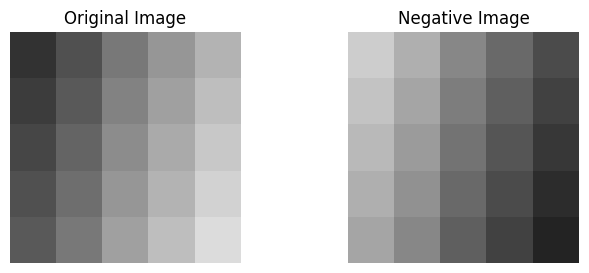

In [ ]:
# --- Install OpenCV in Colab if not already ---
!pip install opencv-python-headless matplotlib

import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import matplotlib.pyplot as plt

# Create a 5x5 grayscale image
image = np.array([
    [50, 80, 120, 150, 180],
    [60, 90, 130, 160, 190],
    [70, 100, 140, 170, 200],
    [80, 110, 150, 180, 210],
    [90, 120, 160, 190, 220]
], dtype=np.uint8)

print("Original Image Matrix:\n", image)

# --- Image Negative using OpenCV ---
negative_image = cv2.bitwise_not(image)  # Inverts pixel values (255 - pixel)

print("\nNegative Image Matrix:\n", negative_image)

# --- Display side-by-side for better visualization ---
# Method 1: Using OpenCV’s cv2_imshow
print("\nUsing OpenCV Display:")
cv2_imshow(image)
cv2_imshow(negative_image)

# Method 2: Using Matplotlib subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(negative_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Negative Image")
axs[1].axis('off')

plt.show()


Original Image Matrix:
 [[100 102 103 104 105]
 [106 107 108 109 110]
 [111 112 113 114 115]
 [116 117 118 119 120]
 [121 122 123 124 125]]

Contrast-Stretched Image Matrix:
 [[  0  20  31  41  51]
 [ 61  71  82  92 102]
 [112 122 133 143 153]
 [163 173 184 194 204]
 [214 224 235 245 255]]

Using OpenCV Display:


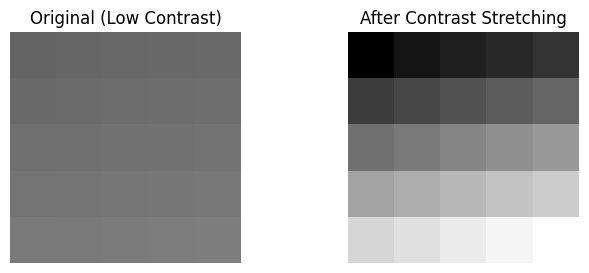

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# --- Step 1: Create a 5x5 low-contrast grayscale image ---
image = np.array([
    [100, 102, 103, 104, 105],
    [106, 107, 108, 109, 110],
    [111, 112, 113, 114, 115],
    [116, 117, 118, 119, 120],
    [121, 122, 123, 124, 125]
], dtype=np.uint8)

print("Original Image Matrix:\n", image)

# --- Step 2: Contrast Stretching using OpenCV normalization ---
# Formula: new_pixel = (pixel - min) * (255 / (max - min))
stretched_image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

print("\nContrast-Stretched Image Matrix:\n", stretched_image)

# --- Step 3: Show using OpenCV and Matplotlib both ---
print("\nUsing OpenCV Display:")
cv2_imshow(image)
cv2_imshow(stretched_image)

# Matplotlib for side-by-side visualization
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Original (Low Contrast)")
axs[0].axis('off')

axs[1].imshow(stretched_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("After Contrast Stretching")
axs[1].axis('off')

plt.show()


Original Image Matrix:
 [[  0   0 255   0   0]
 [  0   0 255   0   0]
 [255 255 255 255 255]
 [  0   0 255   0   0]
 [  0   0 255   0   0]]

Rotated Image Matrix (45°):
 [[ 48  63   0  63  40]
 [ 63 255 123 255  63]
 [  0 123 255 123   0]
 [ 63 255 123 255  63]
 [ 48  63   0  63  40]]

Using OpenCV Display:


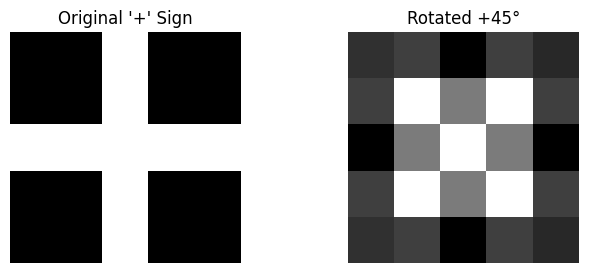

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# --- Step 1: Create a simple 5x5 grayscale matrix ---
image = np.array([
    [0, 0, 255, 0, 0],
    [0, 0, 255, 0, 0],
    [255, 255, 255, 255, 255],
    [0, 0, 255, 0, 0],
    [0, 0, 255, 0, 0]
], dtype=np.uint8)

print("Original Image Matrix:\n", image)

# --- Step 2: Get rotation matrix for 45° ---
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

rotation_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)

# --- Step 3: Apply rotation ---
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

print("\nRotated Image Matrix (45°):\n", rotated_image)

# --- Step 4: Display using OpenCV and Matplotlib ---
print("\nUsing OpenCV Display:")
cv2_imshow(image)
cv2_imshow(rotated_image)

# Matplotlib comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Original '+' Sign")
axs[0].axis('off')

axs[1].imshow(rotated_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Rotated +45°")
axs[1].axis('off')

plt.show()


Original Image Matrix:
 [[ 10  20  30  40  50]
 [ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]
 [210 220 230 240 250]]

Cropped Image Matrix (Center 3x3 Region):
 [[ 70  80  90]
 [120 130 140]
 [170 180 190]]

Using OpenCV Display:


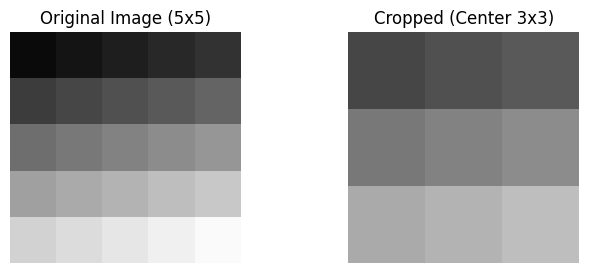

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# --- Step 1: Create a simple 5x5 grayscale image ---
image = np.array([
    [10, 20, 30, 40, 50],
    [60, 70, 80, 90, 100],
    [110, 120, 130, 140, 150],
    [160, 170, 180, 190, 200],
    [210, 220, 230, 240, 250]
], dtype=np.uint8)

print("Original Image Matrix:\n", image)

# --- Step 2: Crop operation (e.g., take center 3x3 block) ---
# Slicing format: image[y1:y2, x1:x2]
cropped_image = image[1:4, 1:4]

print("\nCropped Image Matrix (Center 3x3 Region):\n", cropped_image)

# --- Step 3: Display both images ---
print("\nUsing OpenCV Display:")
cv2_imshow(image)
cv2_imshow(cropped_image)

# --- Step 4: Side-by-side visualization using Matplotlib ---
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Original Image (5x5)")
axs[0].axis('off')

axs[1].imshow(cropped_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Cropped (Center 3x3)")
axs[1].axis('off')

plt.show()
